In [35]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image
import math

In [46]:
im = cv.imread("testt.jpeg")

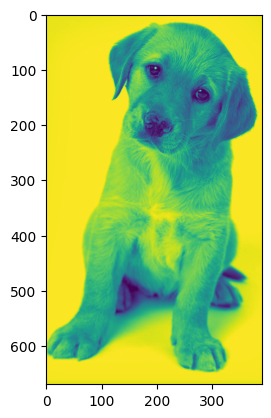

In [51]:
gray_image = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
plt.imshow(gray_image)

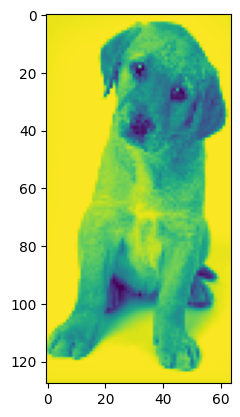

In [62]:
new_im = cv.resize(gray_image, (64, 128))
plt.imshow(new_im)
plt.savefig("testt_resized.jpg")

In [57]:
new_im.shape

(128, 64)

In [59]:
width, height = new_im.shape

In [60]:
print(width,height)

128 64


In [12]:
# averages = []

# for pixel in pix_val:
#     avg_value = sum(pixel) / len(pixel)
#     averages.append(avg_value)

In [32]:
# matrix = []

# for i in range(128):
#     row_values = averages[i * 64: (i + 1) * 64]
#     matrix.append(row_values)

# len(matrix)

128

In [30]:

# Convert the matrix to a numpy array for easier manipulation
matrix = np.array(matrix)


# Define the kernel size
kernel_size = 8

# List to store magnitudes and angles for each kernel
magnitudes_list = []
angles_list = []

# Iterate over the matrix with a step of kernel_size
for i in range(0, matrix.shape[0] - kernel_size + 1, kernel_size):
    for j in range(0, matrix.shape[1] - kernel_size + 1, kernel_size):
        # Extract the 8x8 kernel
        kernel = matrix[i:i+kernel_size, j:j+kernel_size]
        
        # Calculate gradients and magnitude for each element in the kernel
        magnitudes = np.zeros_like(kernel)
        angles = np.zeros_like(kernel)
        for row in range(kernel_size):
            for col in range(kernel_size):
                x_gradient = kernel[min(row + 1, kernel_size - 1), col] - kernel[max(row - 1, 0), col]
                y_gradient = kernel[row, min(col + 1, kernel_size - 1)] - kernel[row, max(col - 1, 0)]
                magnitudes[row, col] = np.sqrt(x_gradient**2 + y_gradient**2)
                angles[row, col] = math.degrees(math.atan2(y_gradient, x_gradient))
                
                # if angles[row, col] < 0:
                angles[row, col] += 180  # Adjust angle to be in the range [0, 360)
        
        # Append the magnitudes and angles to the lists
        magnitudes_list.append(magnitudes)
        angles_list.append(angles)
# print(angles_list)
# print(len(angles_list))

#     print(vector)

128


In [ ]:
import numpy as np
import math

# Function to assign magnitude to angle bins
def assign_magnitude_to_bins(angle, magnitude, bins):
    # Initialize the vector to store magnitude assigned to each bin
    feature_vector = [0] * len(bins)
    
    # Find the bin range where the angle lies
    # for i in range(len(bins)):
    #     # if i == len(bins) - 1:
    #         # Handle wrap-around from 360 degrees to 0 degrees
    #     # bins[i] <= angle < bins[i+1]
    #     if (angle >= bins[len(bins)-1]) and (i == len(bins) -1):
    #         feature_vector[len(bins)-1] += (360 - angle)/40 * magnitude
    #         feature_vector[0] += (angle - 320)/40 * magnitude
    #         # Calculate the fraction of magnitude for the current bin
    #     else:
    #         fraction = (bins[i+1] - angle) / (bins[i+1] - bins[i])
    #         # Assign magnitude to the current and adjacent bins
    #         feature_vector[i] += fraction * magnitude
    #         feature_vector[i+1] += (1 - fraction) * magnitude

    if angle > bins[len(bins) - 1]:
        feature_vector[len(bins)-1] += (360 - angle)/40 * magnitude
        feature_vector[0] += (angle - 320)/40 * magnitude
    else:
        idx = int(angle // 40)
        # print(idx)
        frac = (bins[idx+1] - angle) / (bins[idx+1] - bins[idx])
        feature_vector[idx]  = frac*magnitude
        feature_vector[idx+1] = (1-frac)*magnitude
    
    return feature_vector

# Assuming magnitudes and angles are lists containing the magnitudes and angles for each kernel

# Define the angle bins
bins = [0, 40, 80, 120, 160, 200, 240, 280, 320]

for m,a in zip(magnitudes_list,angles_list):
    


In [ ]:
feature_vectors = []

# Iterate over the magnitudes and angles lists simultaneously
for magnitudes, angles in zip(magnitudes_list, angles_list):
    # Initialize feature vector for the current kernel
    kernel_feature_vector = [0] * len(bins)
    
    # Iterate over each element in the kernel
    for magnitude_row, angle_row in zip(magnitudes, angles):
        for magnitude, angle in zip(magnitude_row, angle_row):
            # Assign magnitude to angle bins
            feature_vector = assign_magnitude_to_bins(angle, magnitude, bins)
            # Accumulate the magnitudes in the feature vector
            kernel_feature_vector = [sum(x) for x in zip(kernel_feature_vector, feature_vector)]
    
    # Add the feature vector for the current kernel to the list
    feature_vectors.append(kernel_feature_vector)

# Convert feature_vectors to numpy array for easier manipulation if needed
feature_vectors = np.array(feature_vectors)

# Print or use the feature vectors as required
# for idx, vector in enumerate(feature_vectors):
#     print("Feature vector for kernel {}:".format(idx))

In [84]:
matrixx = feature_vectors.reshape(16, 8, 9)

In [85]:

# Initialize an empty list to store the resulting feature vectors
resulting_feature_vectors = []

# Iterate through each possible 2x2 slice in the matrix
for i in range(16 - 1):  # Iterate through rows, leaving 1 row for the 2x2 kernel
    for j in range(8 - 1):  # Iterate through columns, leaving 1 column for the 2x2 kernel
        # Extract the 2x2 slice from the matrix
        slice_2x2 = matrixx[i:i+2, j:j+2].copy()

        # Normalize the elements of the slice
        normalized_slice = slice_2x2 / np.linalg.norm(slice_2x2)

        # Flatten the normalized slice into a 1D array
        flattened_slice = normalized_slice.flatten()

        # Append the flattened slice to the resulting feature vectors
        resulting_feature_vectors.append(flattened_slice)

# Convert resulting_feature_vectors to a numpy array for easier manipulation
resulting_feature_vectors = np.array(resulting_feature_vectors)

# Reshape resulting_feature_vectors to have shape (15, 7, 36)
resulting_feature_vectors = resulting_feature_vectors.reshape(15, 7, -1)

# Print the shape of the resulting matrix of 1x36 vectors
print("Shape of the resulting matrix:", resulting_feature_vectors.shape)


Shape of the resulting matrix: (15, 7, 36)


C:\Users\Tanishk Mohan\AppData\Local\Temp\ipykernel_23492\3506563535.py:11: RuntimeWarning: invalid value encountered in divide
  normalized_slice = slice_2x2 / np.linalg.norm(slice_2x2)


In [86]:
print(resulting_feature_vectors)

[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.61265662e-01
   1.06977100e-01 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.18840832e-01
   1.32394743e-01 3.08644674e-03]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.26151329e-01
   1.18859365e-01 6.76915345e-02]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.95203756e-02
   2.94896066e-01 1.70602426e-01]
  [0.00000000e+00 0.00000000e+00 3.64124934e-02 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 8.01906032e-02 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.51893156e-02
   9.13251513e-04 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.66540228e-01
   2.70637464e-02 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.68687715e-04 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [5.98193410e-01 0.00000000e+00 0.00000000e+00 ... 1.49128471e-01
   4.49065

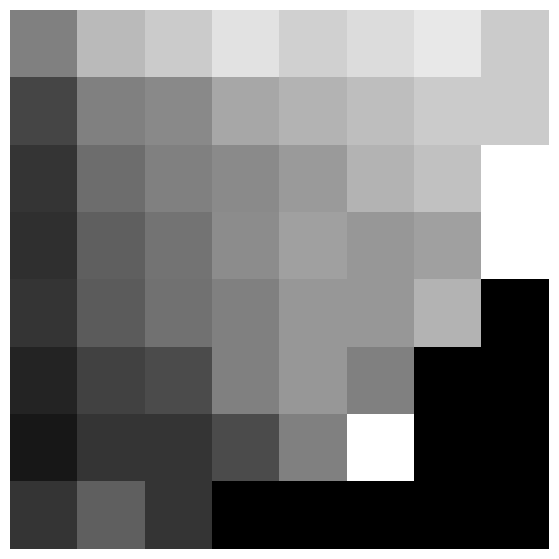

In [87]:
plt.figure(figsize=(15, 7))
plt.imshow(resulting_feature_vector, cmap="gray")
plt.axis("off")
plt.show()